## **FRUIT DATA**

**Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/NalaiyaThiran/Dataset/fruit-dataset.zip")
zip_ref.extractall()
zip_ref.close()


**Importing required packages**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import random
import cv2
from tensorflow.keras import layers, models
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle
import zipfile
tf.__version__

'2.9.2'

In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)

Number of replicas: 1


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
batch_size = 32
IMAGE_SIZE = [128, 128]
EPOCHS = 25

**Uploading Fruit Data**

In [ ]:
TRAIN_PATH = "/content/fruit-dataset/train"

FRUIT_TRAIN_CLASS_NAMES = np.array([str(tf.strings.split(item, os.path.sep)[-1].numpy())[2:-1]
                        for item in tf.io.gfile.glob(str(TRAIN_PATH + "*/*"))])
FRUIT_TRAIN_CLASS_NAMES

array(['Corn_(maize)___healthy', 'Apple___healthy',
       'Corn_(maize)___Northern_Leaf_Blight', 'Apple___Black_rot',
       'Peach___healthy', 'Peach___Bacterial_spot'], dtype='<U35')

In [ ]:
files_train_count = []
for i,f in enumerate(FRUIT_TRAIN_CLASS_NAMES):
    folder_path = os.path.join(TRAIN_PATH, f)
    for path in os.listdir(os.path.join(folder_path)):
        files_train_count.append(['{}/{}'.format(folder_path,path), f, i])
fruits_train_df = pd.DataFrame(files_train_count, columns=['filepath', 'class_name', 'label'])
fruits_train_df.head()

,filepath,class_name,label
0,/content/fruit-dataset/train/Corn_(maize)___he...,Corn_(maize)___healthy,0
1,/content/fruit-dataset/train/Corn_(maize)___he...,Corn_(maize)___healthy,0
2,/content/fruit-dataset/train/Corn_(maize)___he...,Corn_(maize)___healthy,0
3,/content/fruit-dataset/train/Corn_(maize)___he...,Corn_(maize)___healthy,0
4,/content/fruit-dataset/train/Corn_(maize)___he...,Corn_(maize)___healthy,0


In [ ]:
fruits_train_df.class_name.value_counts()

Peach___Bacterial_spot                 1804
Apple___healthy                        1200
Corn_(maize)___healthy                  861
Corn_(maize)___Northern_Leaf_Blight     768
Apple___Black_rot                       440
Peach___healthy                         311
Name: class_name, dtype: int64

**Dealing with Class Imbalance**

In [ ]:
quantidade_por_class = 310
fruits_train_df = pd.concat([fruits_train_df[fruits_train_df['class_name']== i][:quantidade_por_class] for i in FRUIT_TRAIN_CLASS_NAMES])

In [ ]:
fruits_train_df.class_name.value_counts()

Corn_(maize)___healthy                 310
Apple___healthy                        310
Corn_(maize)___Northern_Leaf_Blight    310
Apple___Black_rot                      310
Peach___healthy                        310
Peach___Bacterial_spot                 310
Name: class_name, dtype: int64

**Visualizing Samples**

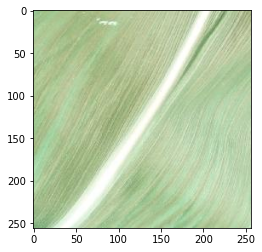

In [ ]:
image = cv2.imread(fruits_train_df.filepath[100])
imgplot = plt.imshow(image)
plt.show()

**Testing Data**

In [ ]:
x_train = fruits_train_df['filepath']
y_train = fruits_train_df['label']

In [ ]:
x_train_tensor = tf.convert_to_tensor(x_train.values, dtype=tf.string)
y_train_tensor = tf.convert_to_tensor(y_train.values)

In [ ]:
TEST_PATH = "/content/fruit-dataset/test"
FRUIT_TEST_CLASS_NAMES = np.array([str(tf.strings.split(item, os.path.sep)[-1].numpy())[2:-1]
                        for item in tf.io.gfile.glob(str(TEST_PATH + "*/*"))])
FRUIT_TEST_CLASS_NAMES

array(['Corn_(maize)___healthy', 'Apple___healthy',
       'Corn_(maize)___Northern_Leaf_Blight', 'Apple___Black_rot',
       'Peach___healthy', 'Peach___Bacterial_spot'], dtype='<U35')

In [ ]:
files_test_count = []
for i,f in enumerate(FRUIT_TEST_CLASS_NAMES):
    folder_test_path = os.path.join(TEST_PATH, f)
    for path in os.listdir(os.path.join(folder_test_path)):
        files_test_count.append(['{}/{}'.format(folder_test_path,path), f, i])
fruits_test_df = pd.DataFrame(files_test_count, columns=['filepath', 'class_name', 'label'])
fruits_test_df.head()

,filepath,class_name,label
0,/content/fruit-dataset/test/Corn_(maize)___hea...,Corn_(maize)___healthy,0
1,/content/fruit-dataset/test/Corn_(maize)___hea...,Corn_(maize)___healthy,0
2,/content/fruit-dataset/test/Corn_(maize)___hea...,Corn_(maize)___healthy,0
3,/content/fruit-dataset/test/Corn_(maize)___hea...,Corn_(maize)___healthy,0
4,/content/fruit-dataset/test/Corn_(maize)___hea...,Corn_(maize)___healthy,0


In [ ]:
fruits_test_df.class_name.value_counts()

Peach___Bacterial_spot                 493
Apple___healthy                        445
Corn_(maize)___healthy                 301
Corn_(maize)___Northern_Leaf_Blight    217
Apple___Black_rot                      181
Peach___healthy                         49
Name: class_name, dtype: int64

In [ ]:
quantidade_por_class = 49
fruits_test_df = pd.concat([fruits_test_df[fruits_test_df['class_name']== i][:quantidade_por_class] for i in FRUIT_TEST_CLASS_NAMES])

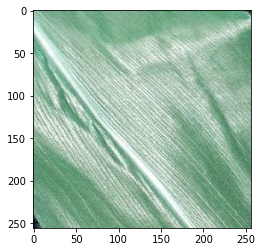

In [ ]:
image = cv2.imread(fruits_test_df.filepath[40])
imgplot = plt.imshow(image)
plt.show()

In [ ]:
x_test = fruits_test_df['filepath']
y_test = fruits_test_df['label']

In [ ]:
x_test_tensor = tf.convert_to_tensor(x_test.values, dtype=tf.string)
y_test_tensor = tf.convert_to_tensor(y_test.values)

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices((x_train_tensor, y_train_tensor))
test_data = tf.data.Dataset.from_tensor_slices((x_test_tensor, y_test_tensor))

In [ ]:
def map_fn(path, label):
    image = tf.image.decode_jpeg(tf.io.read_file(path))
    return image, label
#apply the function
train_data_img = train_data.map(map_fn)
test_data_img = test_data.map(map_fn)

**Visualizing Training and Testing Data**

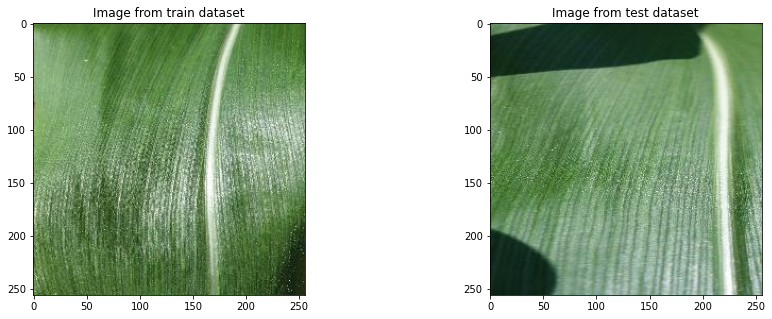

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
for i,l in train_data_img.take(1):
    ax[0].set_title('Image from train dataset');
    ax[0].imshow(i);
for i,l in test_data_img.take(1):
    ax[1].set_title('Image from test dataset');
    ax[1].imshow(i);

## **PREPROCESSING**

In [ ]:
def preprocessing(image, label):
    """
    returns a image that is reshaped and normalized
    """
    image = tf.cast(image, tf.float32)
    image = image / 255.
    image = tf.image.resize(image, IMAGE_SIZE)
    
    return image, label


train_data_norm = train_data_img.map(preprocessing)
test_data_norm = test_data_img.map(preprocessing)

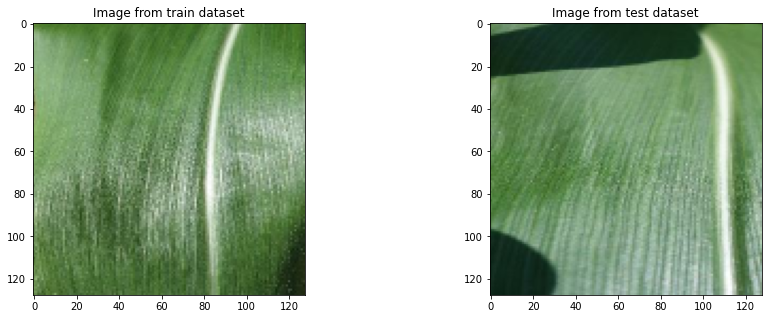

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
for i,l in train_data_norm.take(1):
    ax[0].set_title('Image from train dataset');
    ax[0].imshow(i);
for i,l in test_data_norm.take(1):
    ax[1].set_title('Image from test dataset');
    ax[1].imshow(i);

In [ ]:
train_batches = train_data_norm.batch(batch_size)
test_batches = test_data_norm.batch(batch_size)

for i, l in train_batches.take(1):
    print('Train Data Shape',i.shape)
for i, l in test_batches.take(1):
    print('Test Data Shape',i.shape)

Train Data Shape (32, 128, 128, 3)
Test Data Shape (32, 128, 128, 3)
